In [5]:
%pip install pmdarima

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/625.1 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 71.7/625.1 kB 975.2 kB/s eta 0:00:01
   ------------------------ --------------- 389.1/625.1 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.8 MB 9.6 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.8 MB 9.8 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 10.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 10.7 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.8 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 11.1 MB/s eta 0:00:01
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [2]:
from pmdarima.arima import auto_arima

In [3]:
df = pd.read_excel('energy.xlsx', index_col= 'DATE', parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [4]:
df.shape

(408, 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 1985-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  408 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [7]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [8]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [12]:
df = df.rename(columns={'energy' : 'produção', 'DATE' : 'data'})

<Axes: xlabel='DATE'>

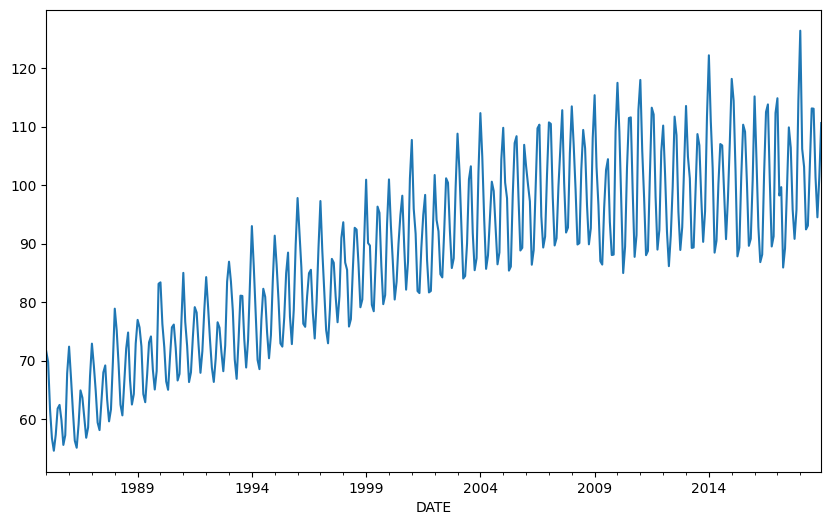

In [13]:
df['produção'].plot(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

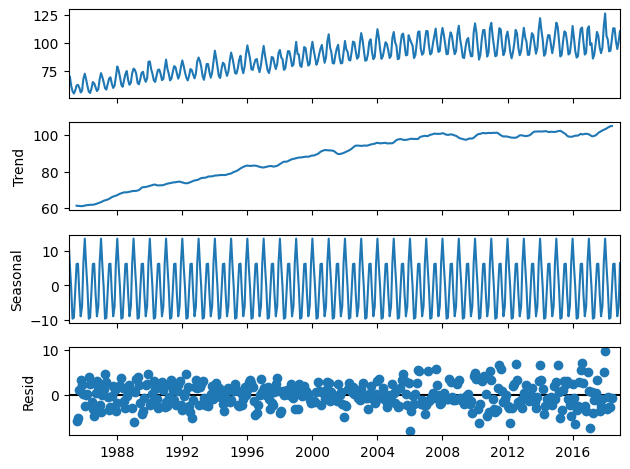

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df)

fig = plt.figure(figsize=(10,6))
fig = result.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['produção'].dropna())
print(f'Teste ADF: {result[0]}')
print(f'p valor: {result[1]}')

Teste ADF: -2.252399047046608
p valor: 0.18777984601967346


In [19]:
df.diff().head()

,produção
DATE,
1985-01-01,NaN
1985-02-01,-1.8050
1985-03-01,-8.1080
1985-04-01,-4.9311
1985-05-01,-2.1314


p value > 5% == estacionaria

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['produção'].diff().dropna())
print(f'Teste ADF: {result[0]}')
print(f'p valor: {result[1]}')

Teste ADF: -7.450892277526375
p valor: 5.674569955854434e-11


In [20]:
fit_arima = auto_arima(df, d=1, start_p= 1, start_q= 1, max_p= 3, max_q= 3, seasonal=True, m=6, D=1, start_P= 1, start_Q=1, max_P=2, max_Q=2, information_criterion="aic", trace=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=2.38 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.23 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=0.36 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=0.69 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.56 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=1.45 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=1.44 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.59 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=1.06 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=0.73 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=1.45 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,2,6))
result_sarimax = model.fit()

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               produção   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Mon, 24 Jun 2024   AIC                           1866.400
Time:                                        08:04:58   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.064      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.181      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
pred = result_sarimax.get_prediction(start=-12)
pred_mean = pred.predicted_mean

In [24]:
inter_conf = pred.conf_int()
limite_abaixo = inter_conf.iloc[:,0]
limite_acima = inter_conf.iloc[:,1]

limite_abaixo[0], limite_acima[0]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\2842249551.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_abaixo[0], limite_acima[0]


(115.14474798330669, 124.45517785857372)

In [25]:
pred_mean[0]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\3910182937.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_mean[0]


119.7999629209402